In [1]:
%matplotlib inline

import cPickle
from imdb import IMDb
import matplotlib.pyplot as plt
import numpy as np
import os
import os.path

PROCESSQUEUEPATH = 'vistvfinales.p'

In [2]:
if os.path.isfile(PROCESSQUEUEPATH):
    # Delete the PROCESSQUEUEPATH file if you want to redownload the rating scores
    theData = cPickle.load(open(PROCESSQUEUEPATH, 'rb'))
else:
    theData =   [{'ID': '0285331', 'Name': '24'},
                 {'ID': '0496424', 'Name': '30 Rock'},
                 {'ID': '0066626', 'Name': 'All in the Family'},
                 {'ID': '0285333', 'Name': 'Alias'},
                 {'ID': '0417299', 'Name': 'Avatar: The Last Airbender'},
                 {'ID': '0076984', 'Name': 'Battlestar Galactica (1978-1979)'},
                 {'ID': '0407362', 'Name': 'Battlestar Galactica (2004-2009)'},
                 {'ID': '0185906', 'Name': 'Band of Brothers'},
                 {'ID': '0979432', 'Name': 'Boardwalk Empire'},
                 {'ID': '0105958', 'Name': 'Boy Meets World'},
                 {'ID': '0903747', 'Name': 'Breaking Bad'},
                 {'ID': '0758737', 'Name': 'Brothers & Sisters'},
                 {'ID': '0118276', 'Name': 'Buffy the Vampire Slayer'},
                 {'ID': '0083399', 'Name': 'Cheers'},
                 {'ID': '0934814', 'Name': 'Chuck'},
                 {'ID': '0077000', 'Name': 'Dallas (1978-1991)'},
                 {'ID': '0410975', 'Name': 'Desperate Housewives'},
                 {'ID': '0773262', 'Name': 'Dexter'},
                 {'ID': '0387199', 'Name': 'Entourage'},
                 {'ID': '0108757', 'Name': 'ER'},
                 {'ID': '0115167', 'Name': 'Everybody Loves Raymond'},
                 {'ID': '0303461', 'Name': 'Firefly'},
                 {'ID': '0106004', 'Name': 'Frasier'},
                 {'ID': '0108778', 'Name': 'Friends'},
                 {'ID': '1119644', 'Name': 'Fringe'},
                 {'ID': '0083413', 'Name': 'Family Ties'},
                 {'ID': '0108778', 'Name': 'Friends'},
                 {'ID': '0149460', 'Name': 'Futurama'},
                 {'ID': '1327801', 'Name': 'Glee'},
                 {'ID': '0813715', 'Name': 'Heroes'},
                 {'ID': '0101120', 'Name': 'Home Improvement'},
                 {'ID': '0412142', 'Name': 'House M.D.'},
                 {'ID': '0460649', 'Name': 'How I Met Your Mother'},
                 {'ID': '0106057', 'Name': 'Lois & Clark: The New Adventures of Superman'},
                 {'ID': '0411008', 'Name': 'Lost'},
                 {'ID': '0068098', 'Name': 'M*A*S*H'},
                 {'ID': '0804503', 'Name': 'Mad Men'},
                 {'ID': '0080240', 'Name': 'Magnum, P.I.'},
                 {'ID': '0212671', 'Name': 'Malcolm in the Middle'},
                 {'ID': '0092400', 'Name': 'Married with Children'},
                 {'ID': '0460091', 'Name': 'My Name is Earl'},
                 {'ID': '0361217', 'Name': 'Nip/Tuck'},
                 {'ID': '1266020', 'Name': 'Parks and Recreation'},
                 {'ID': '0455275', 'Name': 'Prison Break'},
                 {'ID': '0491738', 'Name': 'Psych'},
                 {'ID': '0384766', 'Name': 'Rome'},
                 {'ID': '0094540', 'Name': 'Roseanne'},
                 {'ID': '0285403', 'Name': 'Scrubs'},
                 {'ID': '0098904', 'Name': 'Seinfeld'},
                 {'ID': '0159206', 'Name': 'Sex and the City'},
                 {'ID': '0248654', 'Name': 'Six Feet Under'},
                 {'ID': '0279600', 'Name': 'Smallville'},
                 {'ID': '1442449', 'Name': 'Spartacus: War of the Damned'},
                 {'ID': '0244365', 'Name': 'Star Trek: Enterprise'},
                 {'ID': '0092455', 'Name': 'Star Trek: The Next Generation'},
                 {'ID': '0112178', 'Name': 'Star Trek: Voyager'},
                 {'ID': '0118480', 'Name': 'Stargate SG-1'},
                 {'ID': '0374455', 'Name': 'Stargate: Atlantis'},
                 {'ID': '1286039', 'Name': 'Stargate: Universe'},
                 {'ID': '0165598', 'Name': 'That \'70s Show'},
                 {'ID': '0086687', 'Name': 'The Cosby Show'},
                 {'ID': '0098800', 'Name': 'The Fresh Prince of Bel-Air'},
                 {'ID': '0056757', 'Name': 'The Fugitive'},
                 {'ID': '0330251', 'Name': 'The L Word'},
                 {'ID': '1196946', 'Name': 'The Mentalist'},
                 {'ID': '0290978', 'Name': 'The Office (UK)'},
                 {'ID': '0386676', 'Name': 'The Office (US)'},
                 {'ID': '0374463', 'Name': 'The Pacific'},
                 {'ID': '0286486', 'Name': 'The Shield'},
                 {'ID': '0141842', 'Name': 'The Sopranos'},
                 {'ID': '0306414', 'Name': 'The Wire'},
                 {'ID': '0106179', 'Name': 'The X Files'},
                 {'ID': '0369179', 'Name': 'Two and a Half Men'},
                 {'ID': '0439100', 'Name': 'Weeds'},
                 {'ID': '1358522', 'Name': 'White Collar'}]
print '{0} entries to be plotted'.format(len(theData))

75 entries to be plotted


In [3]:
def sortedSeasons(m):
    """Return a sorted list of seasons of the given series."""
    seasons = m.get('episodes', {}).keys()
    seasons.sort()
    return seasons

def sortedEpisodes(m, season=None):
    """Return a sorted list of episodes of the given series,
    considering only the specified season(s) (every season, if None)."""
    episodes = []
    seasons = season
    if season is None:
        seasons = sortedSeasons(m)
    else:
        if not isinstance(season, (tuple, list)):
            seasons = [season]
    for s in seasons:
        eps_indx = m.get('episodes', {}).get(s, {}).keys()
        eps_indx.sort()
        for e in eps_indx:
            episodes.append(m['episodes'][s][e])
    return episodes

In [4]:
# Start up IMDbPY
i = IMDb()

# Load the rating information if it was not already processed
for currentShow in theData:
    print 'Processing {0}'.format(currentShow['Name'])
    if not 'ratingSeries' in currentShow:
        m = i.get_movie(currentShow['ID'])
        currentShow['ratingSeries'] = m['rating']
    if not 'ratingLastEpisode' in currentShow:
        m = i.get_movie(currentShow['ID'])
        i.update(m, 'episodes')
        lastSeason = sortedSeasons(m)[-1]
        lastEpisode = sortedEpisodes(m, season=lastSeason)[-1]
        i.update(lastEpisode, 'main')
        currentShow['ratingLastEpisode'] = lastEpisode['rating']
    cPickle.dump(theData, open(PROCESSQUEUEPATH, 'wb'))

Processing 24
Processing 30 Rock
Processing All in the Family
Processing Alias
Processing Avatar: The Last Airbender
Processing Battlestar Galactica (1978-1979)
Processing Battlestar Galactica (2004-2009)
Processing Band of Brothers
Processing Boardwalk Empire
Processing Boy Meets World
Processing Breaking Bad
Processing Brothers & Sisters
Processing Buffy the Vampire Slayer
Processing Cheers
Processing Chuck
Processing Dallas (1978-1991)
Processing Desperate Housewives
Processing Dexter
Processing Entourage
Processing ER
Processing Everybody Loves Raymond
Processing Firefly
Processing Frasier
Processing Friends
Processing Fringe
Processing Family Ties
Processing Friends
Processing Futurama
Processing Glee
Processing Heroes
Processing Home Improvement
Processing House M.D.
Processing How I Met Your Mother
Processing Lois & Clark: The New Adventures of Superman
Processing Lost
Processing M*A*S*H
Processing Mad Men
Processing Magnum, P.I.
Processing Malcolm in the Middle
Processing Marri

In [5]:
def genPlot(theData):
    ## Plot the data
    labels = []
    yVal = 0
    fig = plt.figure(num=1, figsize=(9, 9))
    ax = plt.gca()
    ## For each show, add the name to the list of y labels, create an arrow from the average rating
    ## to the rating of the finale (colored red if the finale was lower than the average and green
    ## if it was higher), and plot a black circle for the average rating.
    for currentShow in theData:
        labels.append(currentShow['Name'])
        yVal=yVal+1
        ax.plot([0, 10], [yVal, yVal], 'k', alpha = 0.05)
        if currentShow['ratingLastEpisode'] > currentShow['ratingSeries']:
            ax.arrow(currentShow['ratingSeries'],yVal,
                      currentShow['ratingLastEpisode']-currentShow['ratingSeries'],0,color='g',
                      head_width=0.25, head_length=0.125,length_includes_head=True)
        elif currentShow['ratingLastEpisode'] < currentShow['ratingSeries']:
            ax.arrow(currentShow['ratingSeries'],yVal,
                      -(currentShow['ratingSeries']-currentShow['ratingLastEpisode']),0,color='r',
                      head_width=0.25, head_length=0.125,length_includes_head=True)
        ax.plot(currentShow['ratingSeries'], yVal, 'ok', markersize=4)
    ## Set the axis parameters
    ax.axis([4.0,10.0,0.0,yVal+1.0])
    ax.set_aspect('auto')
    ax.set_yticks(range(1,len(labels)+1))
    ax.set_yticklabels(labels, fontsize=8, va='center')
    plt.subplots_adjust(left=0.5, bottom=0.025, right=0.99, top=1)

    # Explanatory text
    fig.text(0.005, 0.99, 'IMDB.com ratings of\n'
                           'television series finales\n'
                           'relative to their average\n'
                           'episode rating\n',
             fontsize=12, color='black', weight='bold', ha='left', va='top', alpha=1, transform=ax.transAxes)
    fig.text(0.005, 0.80, 'Black Dot -> Average episode rating\n'
                           'Green -> Finale rated higher than average\n'
                           'Red -> Finale rated lower than average',
             fontsize=6, color='black', weight='bold', ha='left', va='top', alpha=1, transform=ax.transAxes)
    # Add some additional info
    fig.text(0.005, 0.005, 'MIT License - https://github.com/OrganicIrradiation/vistvfinales',
             fontsize=6, color='black', ha='left', va='bottom', alpha=0.5, transform=ax.transAxes)
    return [fig, ax]

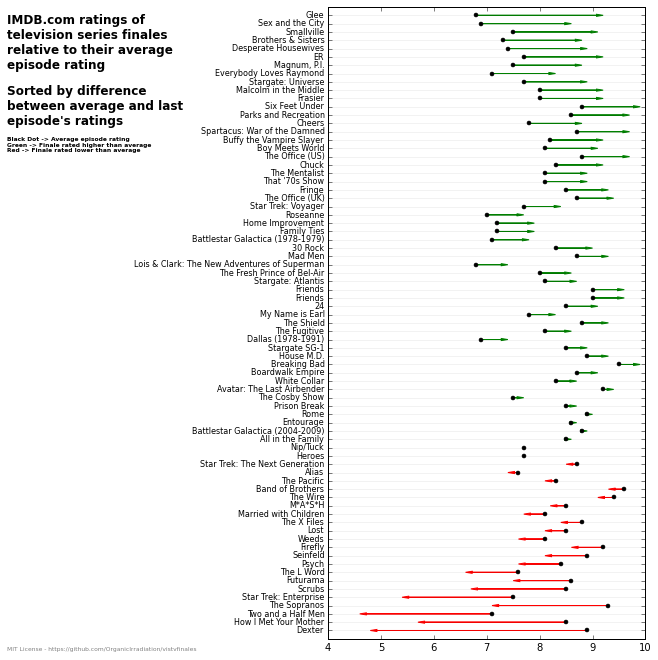

In [6]:
## Sort the data by difference between average and last episode
theData = sorted(theData, key=lambda k: (k['ratingLastEpisode']-k['ratingSeries']))
[fig, ax] = genPlot(theData)
fig.text(0.005, 0.88, 'Sorted by difference\nbetween average and last\nepisode\'s ratings',
         fontsize=12, color='black', weight='bold', ha='left', va='top', alpha=1, transform=ax.transAxes)
plt.show()
fig.savefig('images/img_difference.png', dpi=300)

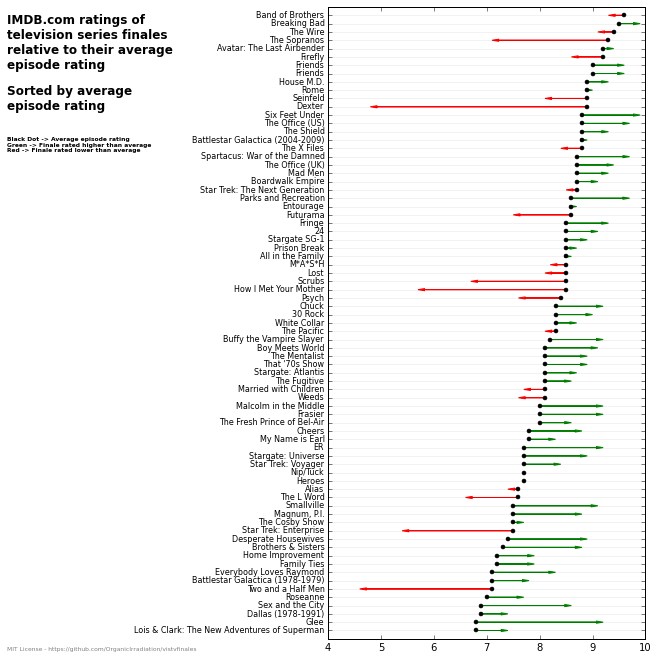

In [7]:
## Sort the data by average rating
theData = sorted(theData, key=lambda k: k['ratingSeries'])
[fig, ax] = genPlot(theData)
fig.text(0.005, 0.88, 'Sorted by average\nepisode rating',
         fontsize=12, color='black', weight='bold', ha='left', va='top', alpha=1, transform=ax.transAxes)
plt.show()
fig.savefig('images/img_averagerating.png', dpi=300)

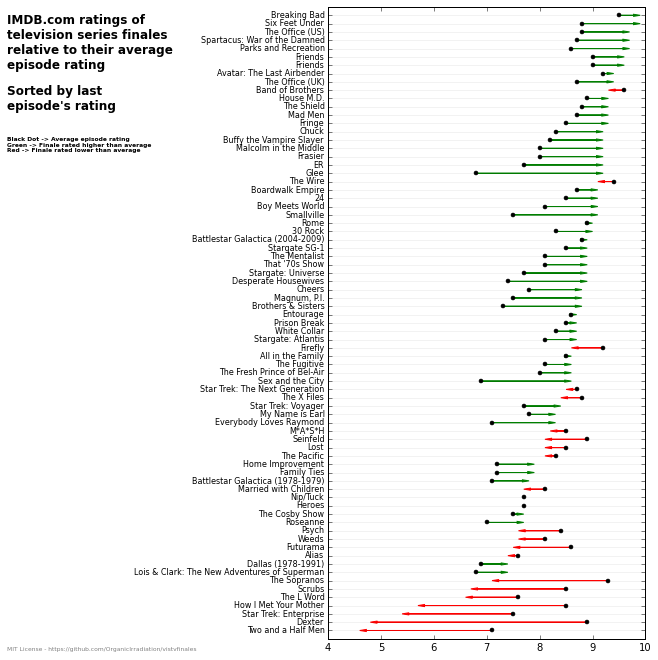

In [8]:
## Sort the data by last episode
theData = sorted(theData, key=lambda k: k['ratingLastEpisode'])
[fig, ax] = genPlot(theData)
fig.text(0.005, 0.88, 'Sorted by last\nepisode\'s rating',
         fontsize=12, color='black', weight='bold', ha='left', va='top', alpha=1, transform=ax.transAxes)
plt.show()
fig.savefig('images/img_lastrating.png', dpi=300)

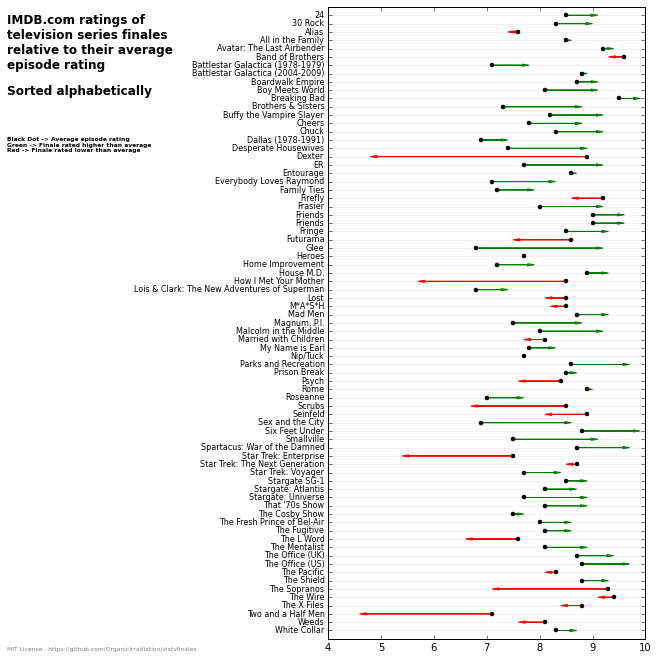

In [9]:
## Sort the data by show rating
theData = sorted(theData, key=lambda k: k['Name'])[::-1]
[fig, ax] = genPlot(theData)
fig.text(0.005, 0.88, 'Sorted alphabetically',
         fontsize=12, color='black', weight='bold', ha='left', va='top', alpha=1, transform=ax.transAxes)
plt.show()
fig.savefig('images/img_alphabetical.png', dpi=300)